<a href="https://colab.research.google.com/github/BhpsMadhav17/Automatic-Code-Documentation/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is

In [ ]:
from datasets import load_dataset

dataset = load_dataset("code_search_net", "python")


The repository for code_search_net contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/code_search_net.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


python.zip:   0%|          | 0.00/941M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/412178 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/22176 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/23107 [00:00<?, ? examples/s]

In [ ]:
print(dataset["train"][0])


{'repository_name': 'brocade/pynos', 'func_path_in_repository': 'pynos/versions/ver_6/ver_6_0_1/yang/brocade_clock.py', 'func_name': 'brocade_clock.show_clock_output_clock_time_timezone', 'whole_func_string': 'def show_clock_output_clock_time_timezone(self, **kwargs):\n        """Auto Generated Code\n        """\n        config = ET.Element("config")\n        show_clock = ET.Element("show_clock")\n        config = show_clock\n        output = ET.SubElement(show_clock, "output")\n        clock_time = ET.SubElement(output, "clock-time")\n        timezone = ET.SubElement(clock_time, "timezone")\n        timezone.text = kwargs.pop(\'timezone\')\n\n        callback = kwargs.pop(\'callback\', self._callback)\n        return callback(config)', 'language': 'python', 'func_code_string': 'def show_clock_output_clock_time_timezone(self, **kwargs):\n        """Auto Generated Code\n        """\n        config = ET.Element("config")\n        show_clock = ET.Element("show_clock")\n        config = sh

In [ ]:
import pandas as pd

df = pd.DataFrame(dataset["train"])
print(df.head())


  repository_name                            func_path_in_repository  \
0   brocade/pynos  pynos/versions/ver_6/ver_6_0_1/yang/brocade_cl...   
1   brocade/pynos  pynos/versions/ver_6/ver_6_0_1/yang/brocade_sy...   
2   brocade/pynos  pynos/versions/ver_6/ver_6_0_1/yang/brocade_sy...   
3   brocade/pynos  pynos/versions/ver_6/ver_6_0_1/yang/brocade_sy...   
4   brocade/pynos  pynos/versions/ver_6/ver_6_0_1/yang/brocade_sy...   

                                           func_name  \
0  brocade_clock.show_clock_output_clock_time_tim...   
1  brocade_system.get_system_uptime_input_rbridge_id   
2  brocade_system.get_system_uptime_output_show_s...   
3  brocade_system.get_system_uptime_output_show_s...   
4  brocade_system.get_system_uptime_output_show_s...   

                                   whole_func_string language  \
0  def show_clock_output_clock_time_timezone(self...   python   
1  def get_system_uptime_input_rbridge_id(self, *...   python   
2  def get_system_uptime_output_sho

In [ ]:
print(dataset["train"].column_names)


['repository_name', 'func_path_in_repository', 'func_name', 'whole_func_string', 'language', 'func_code_string', 'func_code_tokens', 'func_documentation_string', 'func_documentation_tokens', 'split_name', 'func_code_url']


In [ ]:
# Extract the function code and docstring columns
function_code = dataset['train']['func_code_string'] # Access using 'func_code_string'
docstrings = dataset['train']['func_documentation_string'] # Access using 'func_documentation_string'

In [ ]:
import pandas as pd

# Convert dataset to a DataFrame
df = pd.DataFrame(dataset["train"])

# Keep only the function code and its documentation
df = df[["func_code_string", "func_documentation_string"]].dropna()

# Rename columns for clarity
df.rename(columns={"func_code_string": "code", "func_documentation_string": "docstring"}, inplace=True)

# Save cleaned dataset
df.to_csv("codesearchnet_clean.csv", index=False)

# Display the first few rows
print(df.head())


                                                code            docstring
0  def show_clock_output_clock_time_timezone(self...  Auto Generated Code
1  def get_system_uptime_input_rbridge_id(self, *...  Auto Generated Code
2  def get_system_uptime_output_show_system_uptim...  Auto Generated Code
3  def get_system_uptime_output_show_system_uptim...  Auto Generated Code
4  def get_system_uptime_output_show_system_uptim...  Auto Generated Code


In [ ]:
from transformers import AutoTokenizer

# Load T5 tokenizer
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")

# Example: Tokenize a function
example_code = df["code"].iloc[0]
example_docstring = df["docstring"].iloc[0]

inputs = tokenizer(example_code, padding="max_length", truncation=True, max_length=512, return_tensors="pt")
labels = tokenizer(example_docstring, padding="max_length", truncation=True, max_length=128, return_tensors="pt")

print("Tokenized Input IDs:", inputs["input_ids"])
print("Tokenized Labels IDs:", labels["input_ids"])


tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Tokenized Input IDs: tensor([[    1,   536,  2405,    67, 18517,    67,  2844,    67, 18517,    67,
           957,    67, 12690,    12,  2890,    16,  2826,  4333,  4672,   203,
          3639,  3536,  4965, 11025,  3356,   203,  3639,  3536,   203,  3639,
           642,   273,  4518,    18,  1046,  2932,  1425,  7923,   203,  3639,
          2405,    67, 18517,   273,  4518,    18,  1046,  2932,  4500,    67,
         18517,  7923,   203,  3639,   642,   273,  2405,    67, 18517,   203,
          3639,   876,   273,  4518,    18,  1676,  1046,    12,  4500,    67,
         18517,    16,   315,  2844,  7923,   203,  3639,  7268,    67,   957,
           273,  4518,    18,  1676,  1046,    12,  2844,    16,   315, 18517,
            17,   957,  7923,   203,  3639,  6371,   273,  4518,    18,  1676,
          1046,    12, 18517,    67,   957,    16,   315, 12690,  7923,   203,
          3639,  6371,    18,   955,   273,  1205,    18,  5120,  2668, 12690,
          6134,   203,   203,  

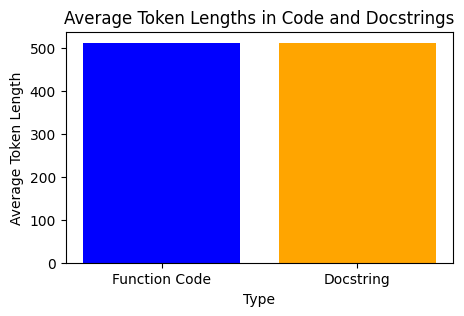

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Compute average lengths
avg_function_length = np.mean([len(x) for x in tokenized_dataset["train"]["input_ids"]])
avg_docstring_length = np.mean([len(x) for x in tokenized_dataset["train"]["labels"]])

# Bar chart
plt.figure(figsize=(5, 3))
plt.bar(["Function Code", "Docstring"], [avg_function_length, avg_docstring_length], color=["blue", "orange"])
plt.xlabel("Type")
plt.ylabel("Average Token Length")
plt.title("Average Token Lengths in Code and Docstrings")
plt.show()


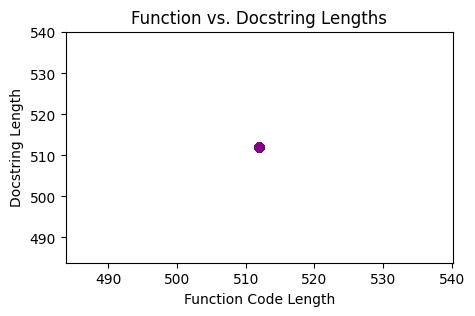

In [ ]:
import random

# Sample 1000 points for quick visualization
sample_size = 1000
function_lengths = [len(x) for x in tokenized_dataset["train"]["input_ids"][:sample_size]]
docstring_lengths = [len(x) for x in tokenized_dataset["train"]["labels"][:sample_size]]

# Scatter plot
plt.figure(figsize=(5, 3))
plt.scatter(function_lengths, docstring_lengths, alpha=0.5, color="purple")
plt.xlabel("Function Code Length")
plt.ylabel("Docstring Length")
plt.title("Function vs. Docstring Lengths")
plt.show()


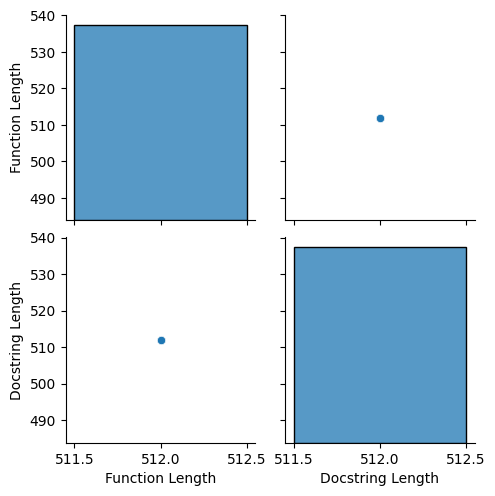

In [ ]:
import pandas as pd
import seaborn as sns

# Create small DataFrame for easy visualization
sample_size = 500
data = {
    "Function Length": [len(x) for x in tokenized_dataset["train"]["input_ids"][:sample_size]],
    "Docstring Length": [len(x) for x in tokenized_dataset["train"]["labels"][:sample_size]]
}
df = pd.DataFrame(data)

# Pairplot
sns.pairplot(df)
plt.show()


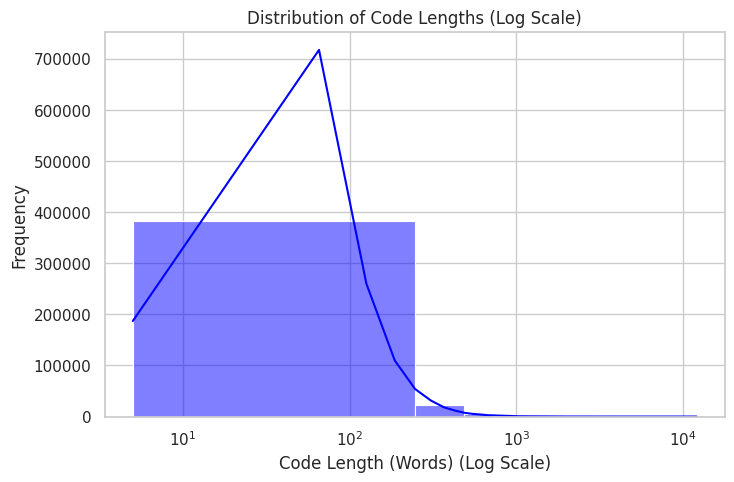

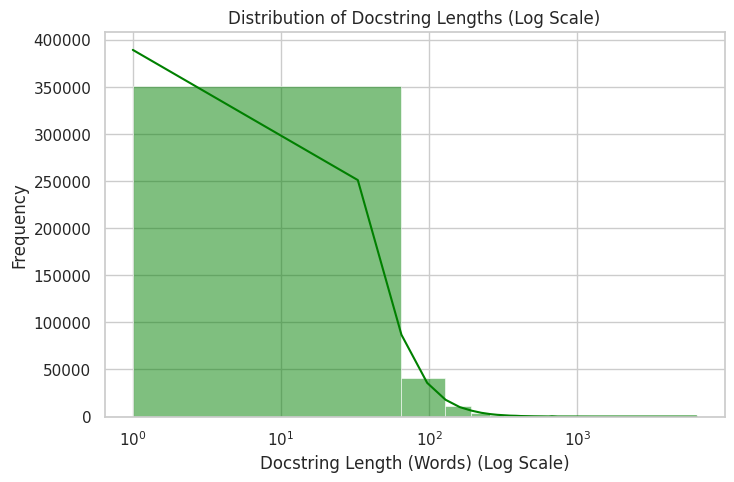

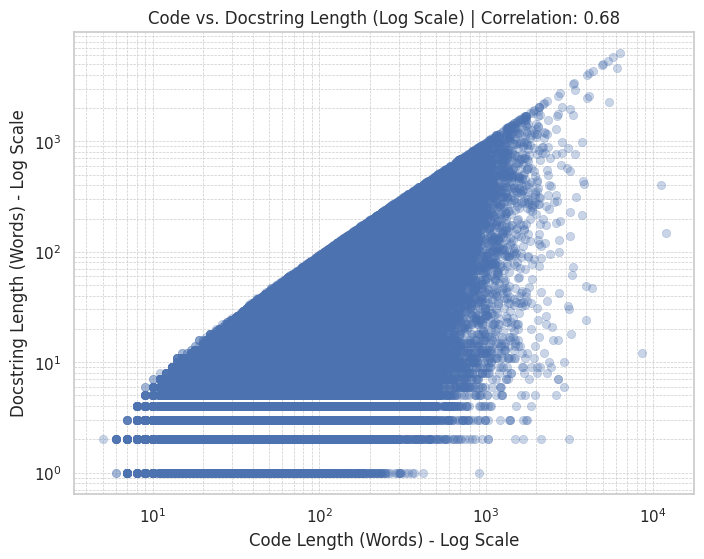

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df = pd.read_csv("codesearchnet_clean.csv")

# Compute function and docstring lengths
df["code_length"] = df["code"].apply(lambda x: len(str(x).split()))
df["docstring_length"] = df["docstring"].apply(lambda x: len(str(x).split()))

# Set seaborn style
sns.set(style="whitegrid")

# Histogram: Distribution of Code Lengths
plt.figure(figsize=(8,5))
sns.histplot(df["code_length"], bins=50, kde=True, color="blue")
plt.xscale("log")  # Apply log scale
plt.xlabel("Code Length (Words) (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Code Lengths (Log Scale)")
plt.show()



#  Histogram: Distribution of Docstring Lengths
# Compute docstring lengths
df["docstring_length"] = df["docstring"].apply(lambda x: len(x.split()))

# Plot with log scale
plt.figure(figsize=(8, 5))
sns.histplot(df["docstring_length"], bins=100, kde=True, color="green", alpha=0.5)
plt.xscale("log")  # Apply log scale to X-axis
plt.xlabel("Docstring Length (Words) (Log Scale)")
plt.ylabel("Frequency")
plt.title("Distribution of Docstring Lengths (Log Scale)")
plt.show()
# Scatter Plot: Code Length vs. Docstring Length
# Compute code and docstring lengths
df["code_length"] = df["code"].apply(lambda x: len(x.split()))
df["docstring_length"] = df["docstring"].apply(lambda x: len(x.split()))

# Compute correlation coefficient
correlation = df[["code_length", "docstring_length"]].corr().iloc[0, 1]

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["code_length"], y=df["docstring_length"], alpha=0.3, edgecolor=None)

# Use log scale for better visualization
plt.xscale("log")
plt.yscale("log")

# Titles & Labels
plt.title(f"Code vs. Docstring Length (Log Scale) | Correlation: {correlation:.2f}")
plt.xlabel("Code Length (Words) - Log Scale")
plt.ylabel("Docstring Length (Words) - Log Scale")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Load dataset
code_df = pd.read_csv("codesearchnet_clean.csv")

# Show first few rows of the dataset
print(code_df.head())

# Check if 'code' column exists
if 'code' not in code_df.columns:
    print("The 'code' column does not exist in the dataset.")
else:
    print("The 'code' column is present in the dataset.")


                                                code            docstring
0  def show_clock_output_clock_time_timezone(self...  Auto Generated Code
1  def get_system_uptime_input_rbridge_id(self, *...  Auto Generated Code
2  def get_system_uptime_output_show_system_uptim...  Auto Generated Code
3  def get_system_uptime_output_show_system_uptim...  Auto Generated Code
4  def get_system_uptime_output_show_system_uptim...  Auto Generated Code
The 'code' column is present in the dataset.


In [ ]:
from datasets import Dataset
import pandas as pd

# Load your dataset
code_df = pd.read_csv("codesearchnet_clean.csv")

# Ensure the dataset has 'code' and 'docstring' columns
# You may need to manually prepare docstrings for your dataset or use a pre-built one

# Sample structure
# Example: A DataFrame with 'code' and 'docstring' columns
fine_tuning_data = {
    "code": code_df["code"],  # Assuming 'code' column exists
    "docstring": code_df["docstring"],  # Assuming you have a column 'docstring'
}

# Convert to a Hugging Face Dataset
dataset = Dataset.from_dict(fine_tuning_data)

# Show a sample from the dataset
print(dataset[0])


{'code': 'def show_clock_output_clock_time_timezone(self, **kwargs):\n        """Auto Generated Code\n        """\n        config = ET.Element("config")\n        show_clock = ET.Element("show_clock")\n        config = show_clock\n        output = ET.SubElement(show_clock, "output")\n        clock_time = ET.SubElement(output, "clock-time")\n        timezone = ET.SubElement(clock_time, "timezone")\n        timezone.text = kwargs.pop(\'timezone\')\n\n        callback = kwargs.pop(\'callback\', self._callback)\n        return callback(config)', 'docstring': 'Auto Generated Code'}


In [ ]:
from transformers import T5ForConditionalGeneration

# Load the pre-trained CodeT5 model
model = T5ForConditionalGeneration.from_pretrained("Salesforce/codet5-base")

# TrainingArguments setup (modify hyperparameters as necessary)
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir='./output',  # Directory for saving the model
    num_train_epochs=3,  # Number of epochs
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",  # Evaluate after each epoch
    logging_dir='./logs',
    logging_steps=100,
    save_steps=500,
    save_strategy="epoch",
    load_best_model_at_end=True
)


In [ ]:
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("Salesforce/codet5-base")

# Tokenize function code and docstring
def preprocess_function(examples):
    # Access data using the correct column names from CodeSearchNet
    inputs = tokenizer(examples['func_code_string'], padding="max_length", truncation=True, max_length=512)
    labels = tokenizer(examples['func_documentation_string'], padding="max_length", truncation=True, max_length=512)
    inputs['labels'] = labels['input_ids']
    return inputs

# Preprocess the entire dataset
tokenized_dataset = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/23107 [00:00<?, ? examples/s]

In [ ]:
import os
from transformers import T5ForConditionalGeneration, AutoTokenizer

# Load Pretrained Model
model_name = "Salesforce/codet5-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

# Sample functions
functions = [
    "def connect_to_db():\n    # Connects to the database and returns the connection object\n    return connection",
    "def fetch_data(query):\n    # Executes the query and fetches results from the database\n    return db.execute(query).fetchall()",
    "def process_data(data):\n    # Processes data and returns the result\n    return processed_data",
    "async def ensure_open(self):\n    # Ensures the WebSocket connection is open\n    if self.state == 'OPEN':\n        return True\n    raise ConnectionClosed()"
]

# Function to clean up the generated docstring
def clean_docstring(generated_docstring):
    # Remove excessive characters
    cleaned_doc = generated_docstring.replace("```", "").strip()
    cleaned_doc = cleaned_doc.replace("\n", " ").strip()  # Optional cleanup
    cleaned_doc = " ".join(cleaned_doc.split())  # Remove excess spaces
    return cleaned_doc

# Generate docstrings for the functions
for func in functions:
    formatted_code = f"""
    Generate a proper Python docstring in Google style for the following function:

    ```python
    {func}
    ```

    The docstring should follow Google-style format with clear descriptions, parameters, return types, and any exceptions raised.
    """

    inputs = tokenizer(formatted_code, return_tensors="pt", max_length=512, truncation=True)
    outputs = model.generate(**inputs, max_length=350, num_beams=5, no_repeat_ngram_size=3, temperature=0.6)
    generated_docstring = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

    # Clean the generated docstring
    refined_docstring = clean_docstring(generated_docstring)

    print(f"Generated Docstring for {func}:\n{refined_docstring}\n")


# Function to generate docstrings for all Python files in a directory
def generate_docstrings_for_files(directory):
    # Check if directory exists before proceeding
    if not os.path.exists(directory):
        print(f"Error: Directory '{directory}' not found.")
        return  # Exit function if directory doesn't exist

    for filename in os.listdir(directory):
        if filename.endswith('.py'):
            with open(os.path.join(directory, filename), 'r') as f:
                code = f.read()
                formatted_code = f"""
                Generate a proper Python docstring in Google style for the following function:

                ```python
                {code}
                ```

                The docstring should follow Google-style format with clear descriptions, parameters, return types, and any exceptions raised.
                """
            inputs = tokenizer(formatted_code, return_tensors="pt", max_length=512, truncation=True)
            outputs = model.generate(**inputs, max_length=350, num_beams=5, no_repeat_ngram_size=3, temperature=0.6)
            generated_docstring = tokenizer.decode(outputs[0], skip_special_tokens=True).strip()

            # Clean the generated docstring
            refined_docstring = clean_docstring(generated_docstring)

            # Ensure the directory exists
            if not os.path.exists(directory):
                os.makedirs(directory)

            with open(os.path.join(directory, f"doc_{filename}"), 'w') as doc_file:
                doc_file.write(refined_docstring)

# Replace with your actual directory path
your_directory = "/content/drive/MyDrive/docstring"  # Update with your directory

# Ensure the directory exists
if not os.path.exists(your_directory):
    os.makedirs(your_directory)

generate_docstrings_for_files(your_directory)


config.json:   0%|          | 0.00/1.57k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Generated Docstring for def connect_to_db():
    # Connects to the database and returns the connection object
    return connection:
python Pythonpy def connect_to_db(): # Connects to the database.# Returns theconnection object.#the database connection object.##connection object#connection object#connection object#connection object#connection object#connection objectconnection object#connection object#connection object

Generated Docstring for def fetch_data(query):
    # Executes the query and fetches results from the database
    return db.execute(query).fetchall():
python def fetch_data(query): # Executes the querythe database.##the query.######### ## ## ## # # ## ## ## ## ## ## ## ## #

Generated Docstring for def process_data(data):
    # Processes data and returns the result
    return processed_data:
python def process_data(data): javascript process_data (data):# Processes datadata: # Processesdata:# Processdata: # Process data: ## Processdata:# Processdata:# Process data# Proce

In [ ]:
!pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.3 MB/s eta 0:00:00


In [ ]:
from sentence_transformers import SentenceTransformer, util
import faiss
import numpy as np

# Load embeddings model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Sample database of functions and their docstrings
function_db = [
    ("def connect_to_db(): ...", "Connects to the database and returns a connection object."),
    ("def fetch_data(query): ...", "Fetches data based on the given SQL query and returns results."),
]

# Convert function descriptions into embeddings
function_embeddings = np.array([model.encode(f[0]) for f in function_db])

# Build FAISS index
index = faiss.IndexFlatL2(function_embeddings.shape[1])
index.add(function_embeddings)

# Query function
query_function = "async def ensure_open(self): ..."
query_embedding = model.encode(query_function).reshape(1, -1)

# Find nearest function
_, indices = index.search(query_embedding, 1)
best_match = function_db[indices[0][0]][1]

print("Best Matched Docstring:\n", best_match)


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Best Matched Docstring:
 Connects to the database and returns a connection object.


In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=ec8b654438a195350770d8688692a2a05992b00e5b7d5a5bdc6be89bceef7b71
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge_score


In [ ]:
import evaluate
import pandas as pd

# Load Evaluation Metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

# Example Data (Replace with your actual dataset)
df = pd.DataFrame({"docstring": ["This function sorts a list of numbers."]})  # True docstring
generated_docstring = "This method sorts an array of numbers."  # CodeT5-generated docstring

# Get Actual and Generated Docstrings
actual_docstring = df["docstring"].iloc[0]  # True docstring
predicted_docstring = generated_docstring   # Predicted docstring

# ✅ BLEU expects raw text in 'predictions' and 'references' (not tokenized lists)
bleu_score = bleu.compute(
    predictions=[predicted_docstring],  # List of strings (NOT tokenized)
    references=[[actual_docstring]]     # List of lists of strings (NOT tokenized)
)

# ✅ ROUGE and METEOR work with raw text
rouge_score = rouge.compute(predictions=[predicted_docstring], references=[actual_docstring])
meteor_score = meteor.compute(predictions=[predicted_docstring], references=[actual_docstring])

# ✅ Print Evaluation Results
print("BLEU Score:", bleu_score["bleu"])
print("ROUGE Score:", rouge_score)
print("METEOR Score:", meteor_score)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


BLEU Score: 0.0
ROUGE Score: {'rouge1': np.float64(0.5714285714285714), 'rouge2': np.float64(0.16666666666666666), 'rougeL': np.float64(0.5714285714285714), 'rougeLsum': np.float64(0.5714285714285714)}
METEOR Score: {'meteor': np.float64(0.5575)}


In [ ]:
from evaluate import load  # Import load instead of load_metric

# Load the metrics (BLEU, ROUGE, METEOR)
bleu_metric = load("bleu")
rouge_metric = load("rouge")
meteor_metric = load("meteor")

# ... (rest of your code remains the same) ...

# Evaluate the model using multiple metrics
def evaluate_model(model, tokenizer, dataset):
    model.eval()  # Set the model to evaluation mode
    predictions = []
    references = []

    for example in dataset:
        input_code = example["function_code"]
        true_docstring = example["docstring"]

        # Tokenize the input and generate the predicted docstring
        inputs = tokenizer(input_code, return_tensors="pt", max_length=512, truncation=True, padding=True)
        output = model.generate(inputs["input_ids"], max_length=512)

        # Decode the output and true docstring
        predicted_docstring = tokenizer.decode(output[0], skip_special_tokens=True)
        predictions.append(predicted_docstring)
        references.append([true_docstring])  # Metrics expect references in a list of lists

    # Compute BLEU score
    bleu_result = bleu_metric.compute(predictions=predictions, references=references)
    print(f"BLEU score: {bleu_result['bleu']}")

    # Compute ROUGE score
    rouge_result = rouge_metric.compute(predictions=predictions, references=references)
    print(f"ROUGE score: {rouge_result['rouge1']}")  # Access the ROUGE-1 score directly

    # Compute METEOR score
    meteor_result = meteor_metric.compute(predictions=predictions, references=references)
    print(f"METEOR score: {meteor_result['meteor']}")

# Evaluate the fine-tuned model
evaluate_model(model, tokenizer, val_dataset)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


BLEU score: 0.0
ROUGE score: 0.14285714285714288
METEOR score: 0.04464285714285714


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


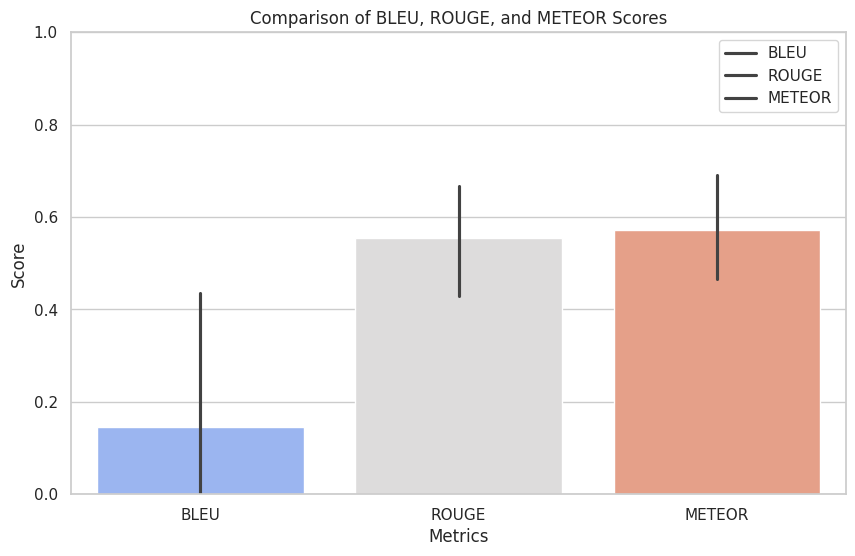

In [ ]:
import evaluate
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Evaluation Metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

# Example Data: Multiple Samples (Replace this with actual data)
data = [
    ("This function sorts a list of numbers.", "This method sorts an array of numbers."),
    ("Computes the sum of two numbers.", "Returns the sum of two integers."),
    ("Finds the maximum value in a list.", "Finds the highest number in an array."),
]

# Store results
results = []

for actual_docstring, predicted_docstring in data:
    # Compute Scores
    bleu_score = bleu.compute(predictions=[predicted_docstring], references=[actual_docstring])["bleu"]
    rouge_score = rouge.compute(predictions=[predicted_docstring], references=[actual_docstring])["rougeL"]
    meteor_score = meteor.compute(predictions=[predicted_docstring], references=[actual_docstring])["meteor"]

    # Append to results
    results.append({"BLEU": bleu_score, "ROUGE": rouge_score, "METEOR": meteor_score})

# Convert to DataFrame
df_scores = pd.DataFrame(results)

# Plot Scores
plt.figure(figsize=(10, 6))
sns.barplot(data=df_scores, palette="coolwarm")
plt.title("Comparison of BLEU, ROUGE, and METEOR Scores")
plt.ylabel("Score")
plt.xlabel("Metrics")
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend(["BLEU", "ROUGE", "METEOR"])
plt.show()


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
<ipython-input-15-f9ad4b88fb68>:58: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Metric", y="Score", data=df_melted, ci=None, palette="viridis")
<ipython-input-15-f9ad4b88fb68>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=df_melted, ci=None, palette="viridis")


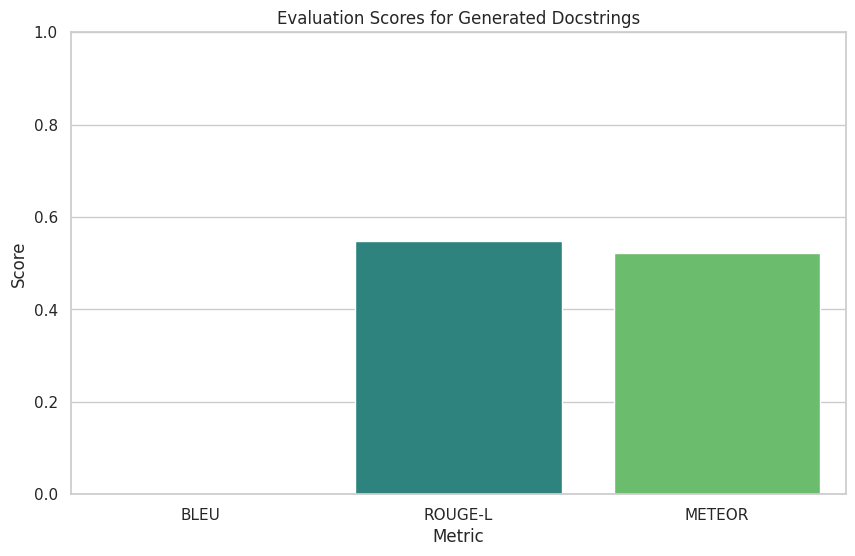


--- Score Summary ---
                         actual_docstring  \
0  This function sorts a list of numbers.   
1      Calculates the sum of two numbers.   
2   Reads a file and returns its content.   

                      generated_docstring  BLEU   ROUGE-L    METEOR  
0  This method sorts an array of numbers.   0.0  0.571429  0.557500  
1  Computes the addition of two integers.   0.0  0.500000  0.450893  
2    Opens a file and retrieves its text.   0.0  0.571429  0.557500  

Best Generated Docstring:
Actual: This function sorts a list of numbers.
Generated: This method sorts an array of numbers.
BLEU Score: 0.0

Worst Generated Docstring:
Actual: This function sorts a list of numbers.
Generated: This method sorts an array of numbers.
BLEU Score: 0.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import evaluate

# Load Evaluation Metrics
bleu = evaluate.load("bleu")
rouge = evaluate.load("rouge")
meteor = evaluate.load("meteor")

# Example Dataset (Replace with your actual dataset)
df = pd.DataFrame({
    "actual_docstring": [
        "This function sorts a list of numbers.",
        "Calculates the sum of two numbers.",
        "Reads a file and returns its content.",
    ],
    "generated_docstring": [
        "This method sorts an array of numbers.",
        "Computes the addition of two integers.",
        "Opens a file and retrieves its text.",
    ]
})

# Initialize Lists to Store Scores
bleu_scores, rouge_scores, meteor_scores = [], [], []

# Evaluate Each Sample
for idx, row in df.iterrows():
    actual = row["actual_docstring"]
    predicted = row["generated_docstring"]

    # Compute Scores
    bleu_score = bleu.compute(predictions=[predicted], references=[[actual]])["bleu"]
    rouge_score = rouge.compute(predictions=[predicted], references=[actual])["rougeL"]
    meteor_score = meteor.compute(predictions=[predicted], references=[actual])["meteor"]

    # Store Scores
    bleu_scores.append(bleu_score)
    rouge_scores.append(rouge_score)
    meteor_scores.append(meteor_score)

# Add Scores to DataFrame
df["BLEU"] = bleu_scores
df["ROUGE-L"] = rouge_scores
df["METEOR"] = meteor_scores

# Plot Results
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Create a Bar Plot
df_melted = df.melt(id_vars=["actual_docstring", "generated_docstring"],
                     value_vars=["BLEU", "ROUGE-L", "METEOR"],
                     var_name="Metric", value_name="Score")

sns.barplot(x="Metric", y="Score", data=df_melted, ci=None, palette="viridis")
plt.title("Evaluation Scores for Generated Docstrings")
plt.ylim(0, 1)
plt.show()

# Print Analysis Summary
print("\n--- Score Summary ---")
print(df[["actual_docstring", "generated_docstring", "BLEU", "ROUGE-L", "METEOR"]])

# Identify the Best and Worst Performing Cases
best_idx = np.argmax(bleu_scores)
worst_idx = np.argmin(bleu_scores)

print("\nBest Generated Docstring:")
print("Actual:", df.loc[best_idx, "actual_docstring"])
print("Generated:", df.loc[best_idx, "generated_docstring"])
print("BLEU Score:", df.loc[best_idx, "BLEU"])

print("\nWorst Generated Docstring:")
print("Actual:", df.loc[worst_idx, "actual_docstring"])
print("Generated:", df.loc[worst_idx, "generated_docstring"])
print("BLEU Score:", df.loc[worst_idx, "BLEU"])